# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in data

In [2]:
resale_data = pd.read_csv('./raw_data/jan_1990_to_feb_2018.csv')

# Cleaning the data

## Splitting the date into 'year' and 'month'

In [3]:
resale_data['year'] = resale_data['month'].apply(lambda x: int(x.split('-')[0]))

In [4]:
resale_data['month'] = resale_data['month'].apply(lambda x: int(x.split('-')[1]))

## Converting the relevant columns to integers

In [5]:
resale_data['floor_area_sqm'] = resale_data['floor_area_sqm'].apply(lambda x: int(x))
resale_data['lease_commence_date'] = resale_data['lease_commence_date'].apply(lambda x: int(x))
resale_data['resale_price'] = resale_data['resale_price'].apply(lambda x: int(x))

## Converting all entries in 'flat_model' column to uppercase

In [6]:
resale_data['flat_model'] = resale_data['flat_model'].apply(lambda x: x.upper())

## Remove the '-' in 'Multi-Generation' for 'flat_type'

In [7]:
resale_data['flat_type'] = resale_data['flat_type'].apply(lambda x: x.replace('-', ' '))

In [37]:
resale_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,2018_price_value,psf_price
0,1,ANG MO KIO,5 ROOM,101,ANG MO KIO AVE 3,07 TO 09,117,STANDARD,1978,118000,1990,191839.191215,152.328729
1,1,ANG MO KIO,4 ROOM,103,ANG MO KIO AVE 3,07 TO 09,90,NEW GENERATION,1978,64500,1990,104861.252825,108.243762
2,1,ANG MO KIO,4 ROOM,105,ANG MO KIO AVE 4,04 TO 06,92,NEW GENERATION,1978,72500,1990,117867.299687,119.024359
3,1,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,10 TO 12,67,NEW GENERATION,1978,34000,1990,55275.699164,76.646052
4,1,ANG MO KIO,3 ROOM,117,ANG MO KIO AVE 4,04 TO 06,74,NEW GENERATION,1978,37000,1990,60152.966737,75.518904


## Store the various inflation rates over the years

In [8]:
inflation_rates = {
    1990: 0.03467, 1991: 0.034167, 1992: 0.02267, 1993: 0.023, 1994: 0.0309167, 1995: 0.0174167, 1996: 0.01375, 1997: 0.02, 1998: -0.00275, 1999: 0.000333, 2000: 0.0135,
    2001: 0.0100833, 2002: -0.0039167, 2003: 0.005, 2004: 0.016833, 2005: 0.0004833, 2006: 0.009667, 2007: 0.02091667, 2008: 0.0660833, 2009: 0.0061667, 2010: 0.02825,
    2011: 0.05241667, 2012: 0.045667, 2013: 0.02375, 2014: 0.01025, 2015: -0.0051667, 2016: -0.00525, 2017: 0.005428,
}

## Convert all resale prices into 2018 present day value

In [12]:
def adj_present_day_price(each_row):
    adj_price = each_row['resale_price']
    resale_year = each_row['year']
    
    while (resale_year != 2018):
        adj_price = adj_price * (1 + inflation_rates[resale_year])
        resale_year += 1
        
    each_row['2018_price_value'] = adj_price
    
    return each_row

In [15]:
resale_data['2018_price_value'] = 0

resale_data = resale_data.apply(adj_present_day_price, axis=1)

## Calculate the per square FOOT price of a unit

In [35]:
def psf_price(each_row):
    adj_price = each_row['2018_price_value']
    sq_feet = each_row['floor_area_sqm'] * 10.7639
    
    each_row['psf_price'] = adj_price / sq_feet
    
    return each_row

In [36]:
resale_data['psf_price'] = 0

resale_data = resale_data.apply(psf_price, axis=1)

## Order data by PSF price

In [59]:
resale_data.sort_values(by=['psf_price'], inplace=True)

In [57]:
resale_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,2018_price_value,psf_price
16811,5,BUKIT MERAH,3 ROOM,33,TAMAN HO SWEE,07 TO 09,62,ADJOINED FLAT,1969,7500,1991,11784.596957,17.658483
39787,12,QUEENSTOWN,4 ROOM,92,C'WEALTH DR,01 TO 03,138,ADJOINED FLAT,1967,20000,1992,30387.347386,20.457099
661,1,GEYLANG,4 ROOM,44,CIRCUIT RD,04 TO 06,94,ADJOINED FLAT,1971,13500,1990,21947.704080,21.691600
12082,12,GEYLANG,4 ROOM,67,CIRCUIT RD,01 TO 03,122,ADJOINED FLAT,1969,18000,1990,29263.605440,22.284267
28562,3,QUEENSTOWN,4 ROOM,45,TANGLIN HALT RD,10 TO 12,112,ADJOINED FLAT,1971,18000,1992,27348.612648,22.685462


## Average per square foot price in present day (2018) value for 1 room flats from 2011

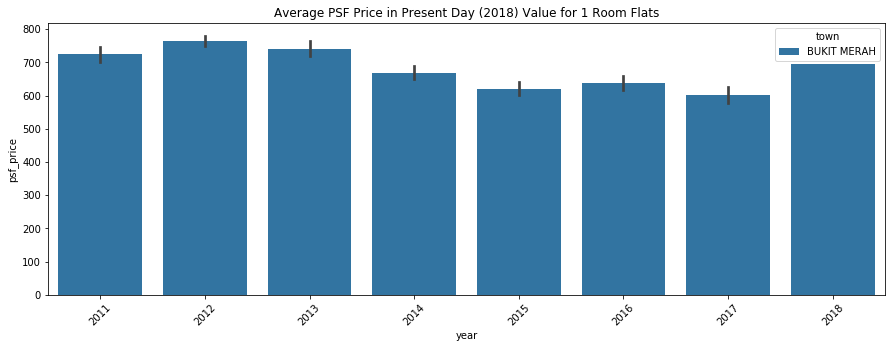

In [41]:
fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='year', y='psf_price', data=resale_data.loc[(resale_data['flat_type'] == '1 ROOM') & (resale_data['year'] >= 2011)], hue='town').set_title('Average PSF Price in Present Day (2018) Value for 1 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Average per square foot price in present day (2018) value for 2 room flats by town from 2011

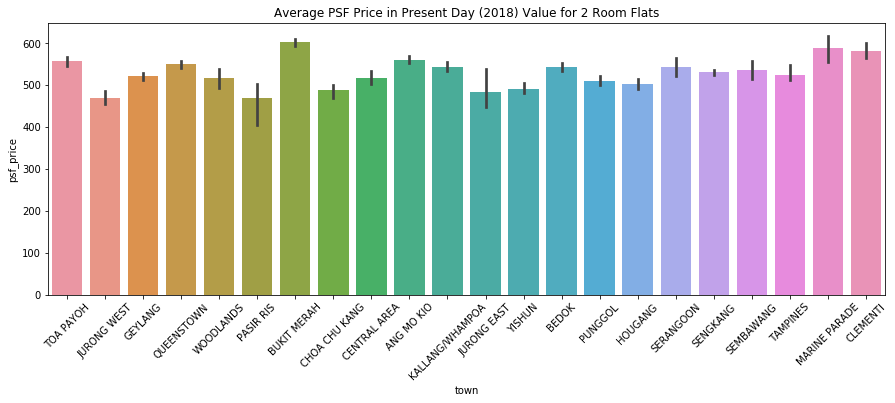

In [61]:
fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='psf_price', data=resale_data.loc[(resale_data['flat_type'] == '2 ROOM') & (resale_data['year'] >= 2011)]).set_title('Average PSF Price in Present Day (2018) Value for 2 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Average per square foot price in present day (2018) value for 3 room flats by town from 2011

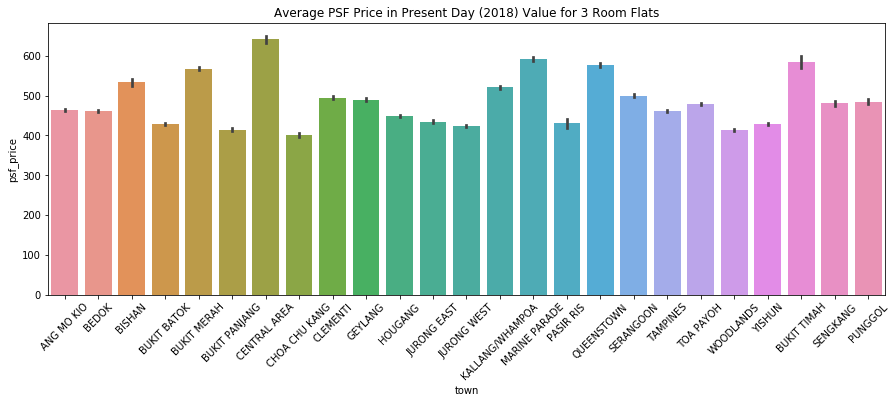

In [46]:
fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='psf_price', data=resale_data.loc[(resale_data['flat_type'] == '3 ROOM') & (resale_data['year'] >= 2011)]).set_title('Average PSF Price in Present Day (2018) Value for 3 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Average per square foot price in present day (2018) value for 4 room flats by town from 2011

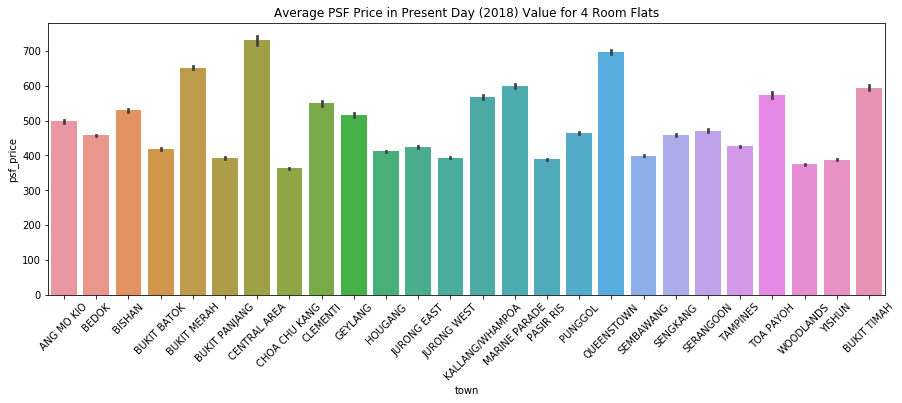

In [47]:
fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='psf_price', data=resale_data.loc[(resale_data['flat_type'] == '4 ROOM') & (resale_data['year'] >= 2011)]).set_title('Average PSF Price in Present Day (2018) Value for 4 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Average per square foot price in present day (2018) value for 5 room flats by town from 2011

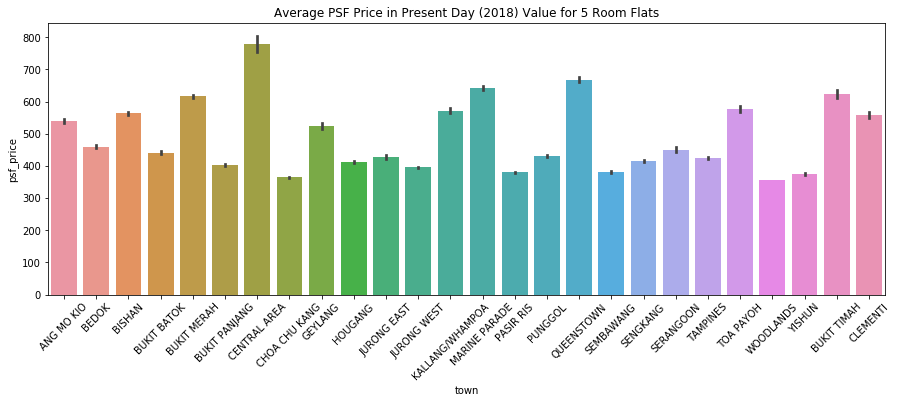

In [48]:
fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='psf_price', data=resale_data.loc[(resale_data['flat_type'] == '5 ROOM') & (resale_data['year'] >= 2011)]).set_title('Average PSF Price in Present Day (2018) Value for 5 Room Flats')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Average per square foot price in present day (2018) value by town from 2011

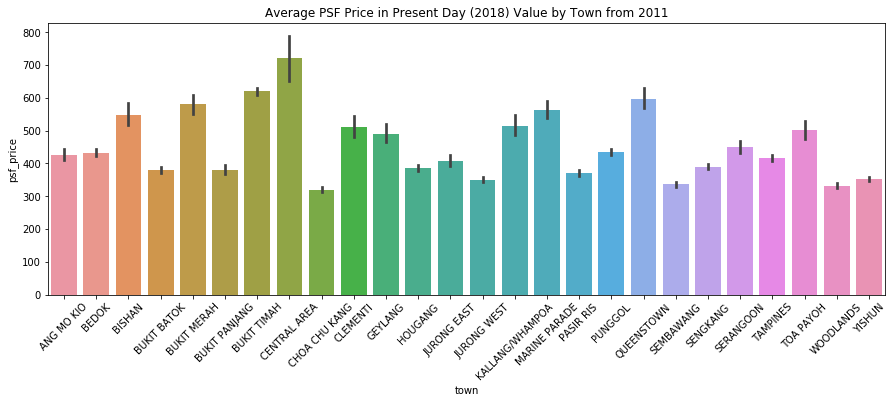

In [49]:
fig, axs = plt.subplots(figsize=(15,5))
x = sns.barplot(x='town', y='psf_price', data=resale_data.loc[(resale_data['year'] == 2018) & (resale_data['year'] >= 2011)]).set_title('Average PSF Price in Present Day (2018) Value by Town from 2011')
for item in axs.get_xticklabels():
    item.set_rotation(45)

## Get a set of all towns that are available in the dataset

In [ ]:
towns = set(resale_data['town'].values)

## Get a graphical representation of resale prices across the years for each room type for each town

In [ ]:
for each_town in towns:
    fig, axs = plt.subplots(figsize=(15,5))
    x = sns.barplot(x='year', y='resale_price', data=resale_data.loc[resale_data['town'] == each_town], hue='flat_type').set_title(each_town)

## Split the dataframe into smaller subsets, by town

In [ ]:
dfs_by_town = {}

for each_town in towns:
    dfs_by_town[each_town] = resale_data.loc[resale_data['town'] == each_town]

In [ ]:
dfs_by_town['JURONG WEST']

## Get a set of all streets for each town that are available in the dataset

In [ ]:
town_to_streets = {}

for each_town in towns:
    town_to_streets[each_town] = set(resale_data.loc[resale_data['town'] == each_town]['street_name'])

In [ ]:
dfs_by_town_street = {}

for each_town in town_to_streets:
    dfs_by_town_street[each_town] = {}
    for each_street in town_to_streets[each_town]:
        dfs_by_town_street[each_town][each_street] = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['street_name'] == each_street)]